In [1]:
import numpy as np
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_excel('iris.xls')

In [4]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Missing Value handling

In [8]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'Missing values')

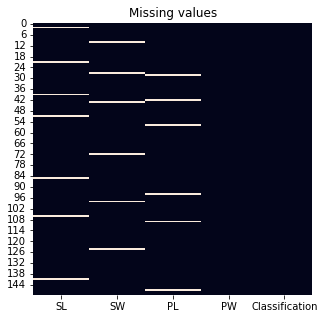

In [9]:
fig = plt.figure(figsize =(5, 5)) #DISPLAYING THE NULLVALUES THROUGH A HEAT MAP
sns.heatmap(data.isnull(),cbar=False).set_title("Missing values")

missing values present so we have to handle that

In [10]:
data['SL'].nunique()

35

In [11]:
data['SL'].value_counts().head()

5.0    10
6.3     9
6.7     8
5.7     8
5.1     7
Name: SL, dtype: int64

In [12]:
data['SW'].value_counts().head()

3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
Name: SW, dtype: int64

In [13]:
data['PL'].value_counts().head()

1.5    14
1.4    11
5.1     8
4.5     8
1.6     7
Name: PL, dtype: int64

In [14]:
#filling the missing values using the mean

In [15]:
data[['SL', 'SW', 'PL']]=data[['SL', 'SW', 'PL']].fillna(data[['SL', 'SW', 'PL']].mean())

In [16]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Data Exploration & Visualization

In [17]:
#Finding the correlation of variables

<AxesSubplot:>

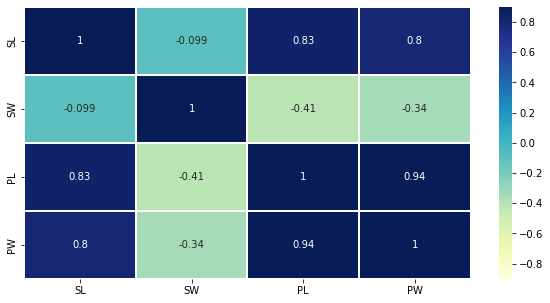

In [18]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,vmin=-0.9,vmax=0.9,linewidth=0.2,annot=True,cmap='YlGnBu')

In [19]:
#finding the relationship between the classification and different variables through violin map

In [20]:
data['Classification'].nunique()

3

In [21]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

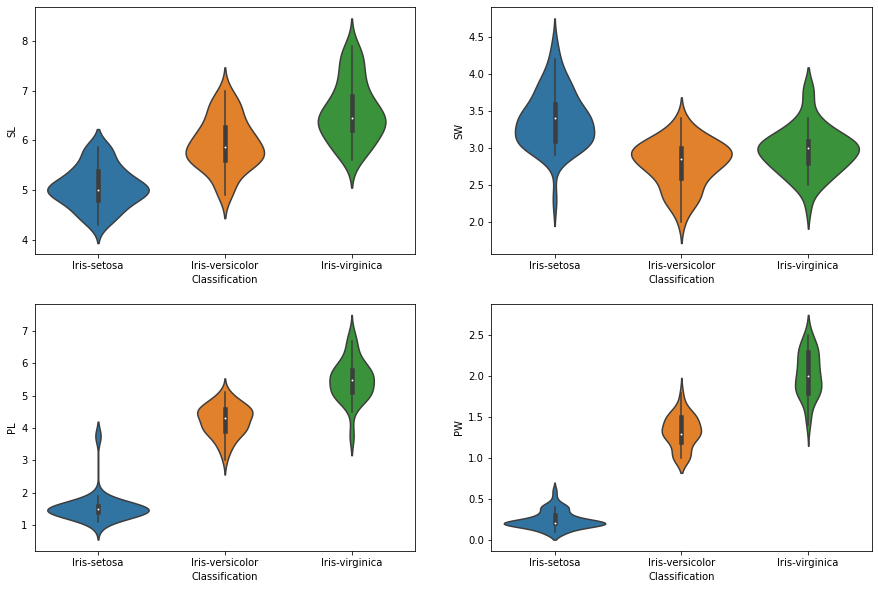

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Classification',y='SL',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Classification',y='SW',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Classification',y='PL',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Classification',y='PW',data=data)
plt.show()

Text(0.5, 1.0, 'petal_length')

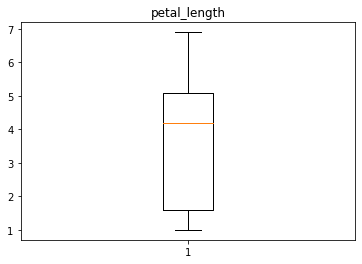

In [23]:
plt.boxplot(data['PL'])    
plt.title('petal_length')  # use boxplot for finding the outliers    

Text(0.5, 1.0, 'sepal_length')

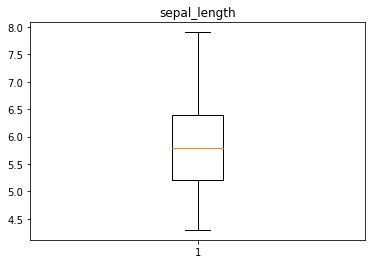

In [24]:
plt.boxplot(data['SL'])    
plt.title('sepal_length')

Text(0.5, 1.0, 'sepal_width')

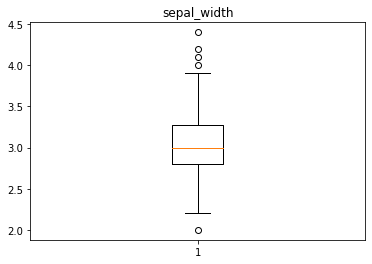

In [25]:
plt.boxplot(data['SW'])    
plt.title('sepal_width')

Text(0.5, 1.0, 'petal_width')

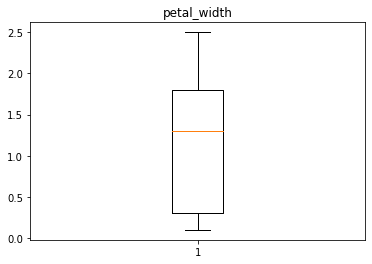

In [26]:
plt.boxplot(data['PW'])    
plt.title('petal_width')

CONCLUSION:
    
    1.The correlation of SW with the other variables are very negligible and it is negatively correlated with the vaariables
    
    2.Outliers are present  in the SW column.We are not handling the outliers because the dataset is small .
    
    3.The SL,PL,PW is higher for Iris-virginica then comes Iris-versicolor and Iris-setosa.But negative trend can be visualised in case of SW
    
    4.Iris-virginica is longest and Iris-setosa is shortest flower

In [27]:
#Splitting the x and y to training and testing

In [28]:
y=data['Classification']
X=data.drop(['Classification'],axis=1)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# CLASSIFICATION MODELS

# Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [33]:
logit_model=LogisticRegression()
logit_model=logit_model.fit(X_train,y_train)
y_pred_logit=logit_model.predict(X_test)

In [34]:
y_pred_logit

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test,y_pred_logit)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [37]:
#from sklearn.metrics import recall_score,precision_score

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logit ))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,y_pred_logit)

1.0

# KNN Model

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
metric_k=[]
neighbors=range(3,18)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    y_pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

In [43]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Text(0, 0.5, 'pred')

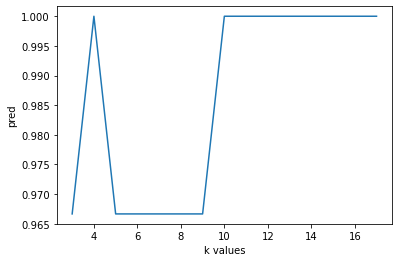

In [44]:
plt.plot(neighbors,metric_k)
plt.xlabel('k values')
plt.ylabel('pred')

In [45]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier=classifier.fit(X_train,y_train)
y_pred_kNN=classifier.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred_kNN)

0.9666666666666667

In [47]:
confusion_matrix(y_test,y_pred_kNN)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_kNN ))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



# SVM

In [49]:
#linear

In [50]:
from sklearn.svm import SVC

In [51]:
clf_svm=SVC(kernel='linear')
clf_svm=clf_svm.fit(X_train,y_train)
y_pred_svm=clf_svm.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [53]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [54]:
accuracy_score(y_test,y_pred_svm)

1.0

In [55]:
#rbf

In [56]:
clf_svm=SVC(kernel='rbf')
clf_svm=clf_svm.fit(X_train,y_train)
y_pred_svm=clf_svm.predict(X_test)

In [57]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [58]:
accuracy_score(y_test,y_pred_svm)

1.0

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# DecisionTree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dt_clf=DecisionTreeClassifier()
df_clf=dt_clf.fit(X_train,y_train)
y_pred_dt=dt_clf.predict(X_test)

In [62]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [63]:
accuracy_score(y_test,y_pred_dt)

1.0

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt ))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred_rf)

1.0

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

